<a href="https://colab.research.google.com/github/leeEunJooo/NetworkAssociation/blob/master/groupbyClient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import pandas as pd
import time
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

%matplotlib inline 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/drive/My Drive/졸업과제/sortby_MAC_Time.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,8,10,11,12,13,15,16,17,18,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
data

,Unnamed: 0,l1,AP,AP.1,AP.2,AP.3,Client.4,Client.5,Client.6,Client.10,Session Duration,Session Duration.1,Session Duration.2,Session Duration.3,Utilization,Utilization.1,Utilization.2,Utilization.3,Utilization.4,Utilization.5,Utilization.6,Utilization.7,Utilization.8,Disassociation Time.6,Association Time.6
0,0,l2,IP Address,MAC Address,Map Location,Name,Endpoint Type,IP Address,MAC Address,SSID,days,hours,minutes,seconds,Avg. Session Throughput (Kbps),Bytes Received,Bytes Sent,Data Retries,Packets Received,Packets Sent,RSSI (dBm),RTS Retries,SNR (dB),NaN,NaN
1,1,4408787,172.20.120.113,00:c8:8b:21:ae:80,Pusan > Inmoon (306) > Inmoon 1F,16AP-306-1-3,Android-LG,164.125.250.67,0,PNU-WiFi,0,0,15,3,<0.1,0,0,9155,0,0,-71,0,19,2019-05-19 00:49:46,2019-05-19 00:34:43
2,2,3451965,172.20.146.92,08:17:35:c7:5c:50,PUSAN-OUTDOOR > PUSAN-OUTDOOR,11S-508-OUT-2,Android-LG,164.125.250.67,0,PNU-WiFi,0,0,35,6,6.8,159257,95660,278,327,383,-87,0,8,2019-05-19 01:24:52,2019-05-19 00:49:46
3,3,4980360,164.125.10.205,44:e4:d9:85:2d:a0,Pusan > NewJunsan (515) > NewJunsan 1F,SAP-10.205,Android-LG,164.125.250.67,0,PNU-WiFi,0,0,35,8,<0.1,0,0,278,0,0,-73,0,21,2019-05-19 02:05:03,2019-05-19 01:29:55
4,4,4487815,172.20.119.131,cc:16:7e:3e:10:40,Pusan > Inmoon (306) > Inmoon 3F,16K-306-3-1,Android-LG,164.125.250.67,0,PNU-WiFi,0,0,10,3,<0.1,0,0,7,0,0,-76,0,11,2019-05-19 03:05:25,2019-05-19 02:55:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775558,9775558,9769174,172.20.180.145,50:0f:80:39:ad:80,YangSan > Sanhak > 4F,17AP-Y15-4-2,Microsoft-Workstation,164.125.250.118,68541,PNU-WiFi,0,0,15,4,21.3,756432,71689,844,766,609,-67,0,28,2020-02-07 12:01:22,2020-02-07 11:46:18
9775559,9775559,9769175,172.20.180.145,50:0f:80:39:ad:80,YangSan > Sanhak > 4F,17AP-Y15-4-2,Microsoft-Workstation,164.125.250.118,68541,PNU-WiFi,0,2,25,49,"24,837.4",27069824121,96133701,2117751,26349941,1522114,-63,0,32,2020-02-07 16:27:45,2020-02-07 14:01:56
9775560,9775560,9773329,172.20.180.150,40:01:7a:83:a1:c0,YangSan > Sanhak > 4F,17AP-Y15-4-7,Microsoft-Workstation,172.21.15.12,68542,PNU-WiFi,0,0,30,11,6.6,1188915,193671,852,1429,1251,-51,0,44,2019-10-15 13:21:26,2019-10-15 12:51:15
9775561,9775561,9773330,172.20.180.150,40:01:7a:83:a1:c0,YangSan > Sanhak > 4F,17AP-Y15-4-7,Microsoft-Workstation,172.21.15.12,68542,PNU-WiFi,0,0,4,59,<0.1,0,0,423,0,0,-52,0,38,2019-10-15 14:02:02,2019-10-15 13:57:03


In [4]:
data['Client.10'].value_counts()

PNU-WiFi     8591919
eduroam      1183430
IPHAK-2          132
PNU-GUIDE         78
flextest           3
SSID               1
Name: Client.10, dtype: int64

In [5]:
set(data[data['Client.6'] == 8267]['AP.2'])

{'Pusan > GunSul (401) > Gunsul7F',
 'Pusan > GunSul (401) > Gunsul8F',
 'Pusan > GunSul (401) > Gunsul9F'}

In [6]:
data[data['Client.6'] == 8267]['Utilization.2'].sum()

59245604

In [7]:
set(data[data['Client.6'] == 41834]['AP.2'])

{'PUSAN-OUTDOOR > PUSAN-OUTDOOR',
 'Pusan > BonKwan (205) > BonGwan1F',
 'Pusan > NewJunsan (515) > NewJunsan 1F',
 'Pusan > NewJunsan (515) > NewJunsan 2F'}

In [8]:
data[data['Client.6'] == 41834]['Utilization.2'].sum()

746327113

#위 두가지를 비교해보면 8267이 연결 횟수가 더 많지만 데이터 총량은 41834가 훨씬 많음

In [9]:
only = data[['Client.6', 'AP.2', 'Utilization.1', 'Utilization.2']]

#Client MAC 주소와 AP 위치, 바이트 주고 받은 양만 일단 골라내봄

In [10]:
only['Utilization.1'][1:] = pd.to_numeric(only['Utilization.1'][1:])
only['Utilization.2'][1:] = pd.to_numeric(only['Utilization.2'][1:])
only['Client.6'][1:] = pd.to_numeric(only['Client.6'][1:])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_with(key, value)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [42]:
temp = only
temp = temp.drop(0,0)

In [43]:
aa = temp.groupby('Client.6').size()
delete = []
aa

Client.6
0         423
1         695
2         784
3         894
4        2101
         ... 
68539       1
68540      19
68541       2
68542       2
68543       1
Length: 68544, dtype: int64

In [44]:
for a in aa :
  if aa[a] < 1000 :
    delete.append(a)

In [45]:
delete_index = temp[temp['Client.6'].isin(delete)].index
delete_index

Int64Index([    424,     425,     426,     427,     428,     429,     430,
                431,     432,     433,
            ...
            2660251, 2660252, 2660253, 2660254, 2660255, 2660256, 2660257,
            2660258, 2660259, 2660260],
           dtype='int64', length=538565)

In [46]:
len(delete_index)

538565

#session 100개 이하인것들의 index

In [47]:
temp = temp.drop(delete_index)

In [48]:
temp

,Client.6,AP.2,Utilization.1,Utilization.2
1,0,Pusan > Inmoon (306) > Inmoon 1F,0,0
2,0,PUSAN-OUTDOOR > PUSAN-OUTDOOR,159257,95660
3,0,Pusan > NewJunsan (515) > NewJunsan 1F,0,0
4,0,Pusan > Inmoon (306) > Inmoon 3F,0,0
5,0,Pusan > BonKwan (205) > BonGwan10F,0,0
...,...,...,...,...
9775558,68541,YangSan > Sanhak > 4F,756432,71689
9775559,68541,YangSan > Sanhak > 4F,27069824121,96133701
9775560,68542,YangSan > Sanhak > 4F,1188915,193671
9775561,68542,YangSan > Sanhak > 4F,0,0


#groupby 하는데 시간이 너무 오래걸려서 연결 횟수가 1000번 아래인것들은 제외

In [49]:
grouped = temp.groupby(by = ['Client.6', 'AP.2']).sum()

In [50]:
grouped

Utilization.1  Utilization.2
Client.6 AP.2                                                           
0        PUSAN-OUTDOOR > PUSAN-OUTDOOR            7368301        2478767
         Pusan > 1Sabeom (417) > 1SaBeom1F         679681         151104
         Pusan > 1Sabeom (417) > 1SaBeom3F      231729451       25989107
         Pusan > 2SaBeom (701) > 2SaBeom1F       92256693       16832942
         Pusan > 2SaBeom (701) > 2SaBeom2F              0              0
...                                                   ...            ...
68539    YangSan > Sanhak > 4F                  633747812       11268984
68540    YangSan > Sanhak > 4F                31450938719     2912428717
68541    YangSan > Sanhak > 4F                27070580553       96205390
68542    YangSan > Sanhak > 4F                    1188915         193671
68543    YangSan > Sanhak > 4F                    7343460         590456

[923451 rows x 2 columns]

In [83]:
rgrouped = grouped.reset_index(drop = False, inplace = False)
rgrouped

,Client.6,AP.2,Utilization.1,Utilization.2
0,0,PUSAN-OUTDOOR > PUSAN-OUTDOOR,7368301,2478767
1,0,Pusan > 1Sabeom (417) > 1SaBeom1F,679681,151104
2,0,Pusan > 1Sabeom (417) > 1SaBeom3F,231729451,25989107
3,0,Pusan > 2SaBeom (701) > 2SaBeom1F,92256693,16832942
4,0,Pusan > 2SaBeom (701) > 2SaBeom2F,0,0
...,...,...,...,...
923446,68539,YangSan > Sanhak > 4F,633747812,11268984
923447,68540,YangSan > Sanhak > 4F,31450938719,2912428717
923448,68541,YangSan > Sanhak > 4F,27070580553,96205390
923449,68542,YangSan > Sanhak > 4F,1188915,193671


In [88]:
feature = rgrouped[ ['Client.6','Utilization.1','Utilization.2']]
model = KMeans(n_clusters=5,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [89]:
r = pd.concat([rgrouped,predict],axis=1)

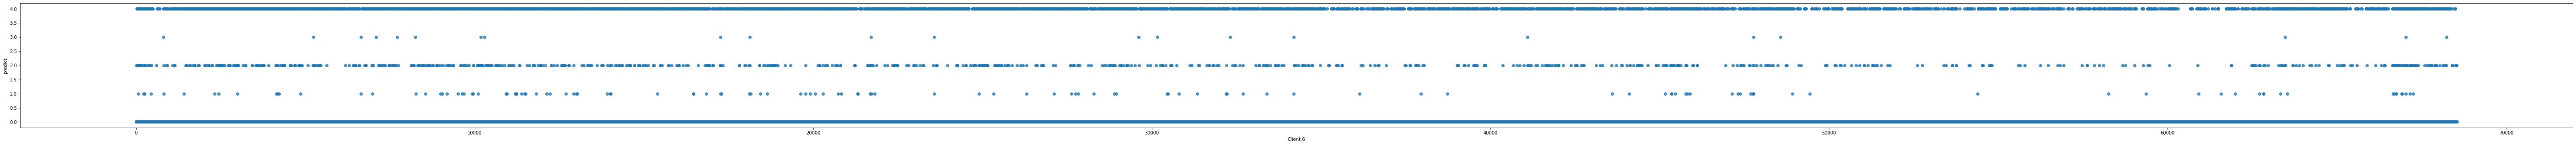

In [98]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)

figure.set_size_inches(100,5)

sns.regplot(x=r['Client.6'], 

           y=r['predict'], 

           fit_reg=False) # no regression line


scale = StandardScaler()
scale.fit(grouped)
scaled_X = scale.transform(grouped)
grouped['scaled_x'] = scaled_X[:,0]
grouped['scaled_y'] = scaled_X[:,1]
dbscan = DBSCAN(eps = 0.5, min_samples = 3)
cluster = dbscan.fit_predict(scaled_X)
grouped['cluster'] = cluster

plt.scatter(x = grouped.scaled_x, y = grouped.scaled_y, c = grouped.cluster)
plt.title('DBSCAN Clustering in TonghabGige')
plt.xlabel('scaled_x')
plt.ylabel('scaled_y')



In [ ]:
!free